In [1]:
# core libraries
import numpy as np
import pandas as pd

# statistics & math
from scipy import stats

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# model evaluation matrics
from sklearn.metrics import mean_squared_error

# model selection & validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# preprocessing & feature engineering
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
import category_encoders as ce

# pipelines & column transformers
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer

# linear & regularized models
from sklearn.linear_model import LinearRegression, Ridge

# tree-based & ensemple models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor

# boosting models (external libraries)
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import lightgbm as lgb


In [2]:
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')


## EDA

In [3]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### `Outlier Handling`

In [5]:
train_df.dtypes[train_df.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

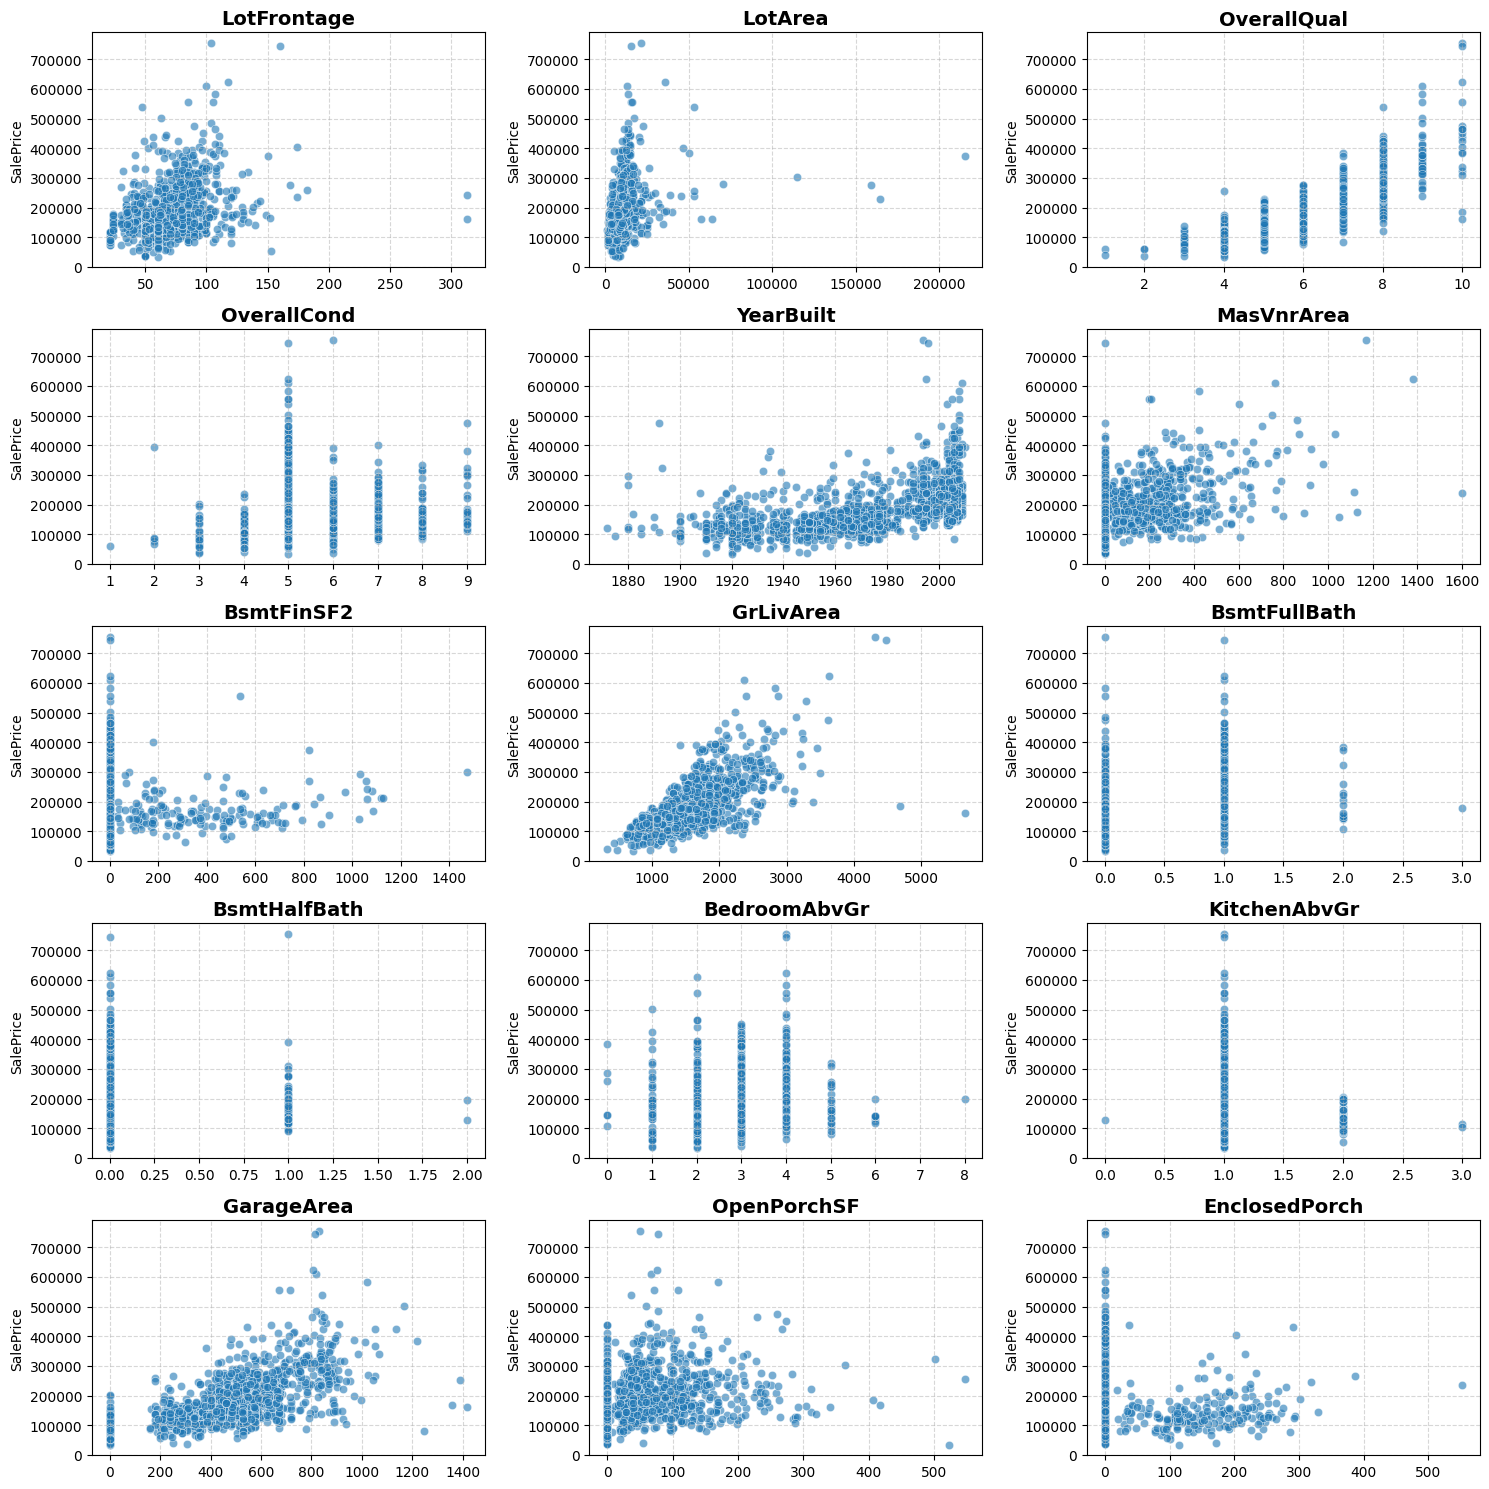

In [6]:
outlier_features = [
    'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
    'YearBuilt', 'MasVnrArea', 'BsmtFinSF2', 'GrLivArea', 
    'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
    'GarageArea', 'OpenPorchSF', 'EnclosedPorch'
]

fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(outlier_features):
    sns.scatterplot(x=col, y='SalePrice', data=train_df, ax=axes[i], alpha=0.6)
    axes[i].set_title(f'{col}', fontsize=14, fontweight='bold')
    axes[i].grid(True, linestyle='--', alpha=0.5)
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [7]:
# outlier from queries

# LotFrontage > 300, Id: 935, 1299
# LotArea > 55000, Id: 250, 314, 336, 707
# OverallQual == 10, Id: 524
# OverallCond == 2, Id: 379
# OverallCond == 5 & SalePrice > 700000, Id: 1183
# OverallCond == 6 & SalePrice > 700000, Id: 692
# YearBuilt < 1900 & SalePrice > 400000, Id: 186
# YearRemodAdd < 1970 & SalePrice > 300000, Id: 314
# MasVnrArea > 1500, Id: 298
# BsmtFinSF1 > 5000, Id: 1299
# BsmtFinSF2 > 400 & SalePrice > 500000, Id: 441
# TotalBsmtSF > 5000, Id: 1299
# LowQualFinSF > 550, Id: 186
# GrLivArea > 4500, Id: 524, 1299
# BsmtFullBath == 3, Id: 739
# BsmtHalfBath == 2, Id: 598, 955
# BedroomAbvGr == 8, Id: 636
# KitchenAbvGr == 3, Id: 49, 810
# TotRmsAbvGrd == 14, Id: 636
# GarageArea > 1200, Id: 1062, 1191
# OpenPorchSF > 500, Id: 496
# EnclosedPorch > 500, Id: 198

values = [935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 524, 739, 598, 955, 636, 49, 810, 1062, 1191, 496, 198]

# outlier drop
train_df = train_df[~train_df.Id.isin(values)].reset_index(drop=True)

### `NaN Handling`

In [8]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1434
MiscFeature,1387
Alley,1348
Fence,1162
MasVnrType,860
FireplaceQu,683
LotFrontage,255
GarageYrBlt,76
GarageCond,76
GarageType,76


In [9]:
no_cols = [
    'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 
    'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 
    'BsmtExposure', 'BsmtQual', 'BsmtCond'
]
for col in no_cols:
    train_df[col] = train_df[col].fillna('No')
    test_df[col] = test_df[col].fillna('No')

zero_cols = ['LotFrontage', 'MasVnrArea']
for col in zero_cols:
    train_df[col] = train_df[col].fillna(0)
    test_df[col] = test_df[col].fillna(0)

unf_cols = ['BsmtFinType1', 'BsmtFinType2']
for col in unf_cols:
    train_df[col] = train_df[col].fillna('Unf')
    test_df[col] = test_df[col].fillna('Unf')
    
train_df['Electrical'] = train_df['Electrical'].fillna('SBrkr')
test_df['Electrical'] = test_df['Electrical'].fillna('SBrkr')

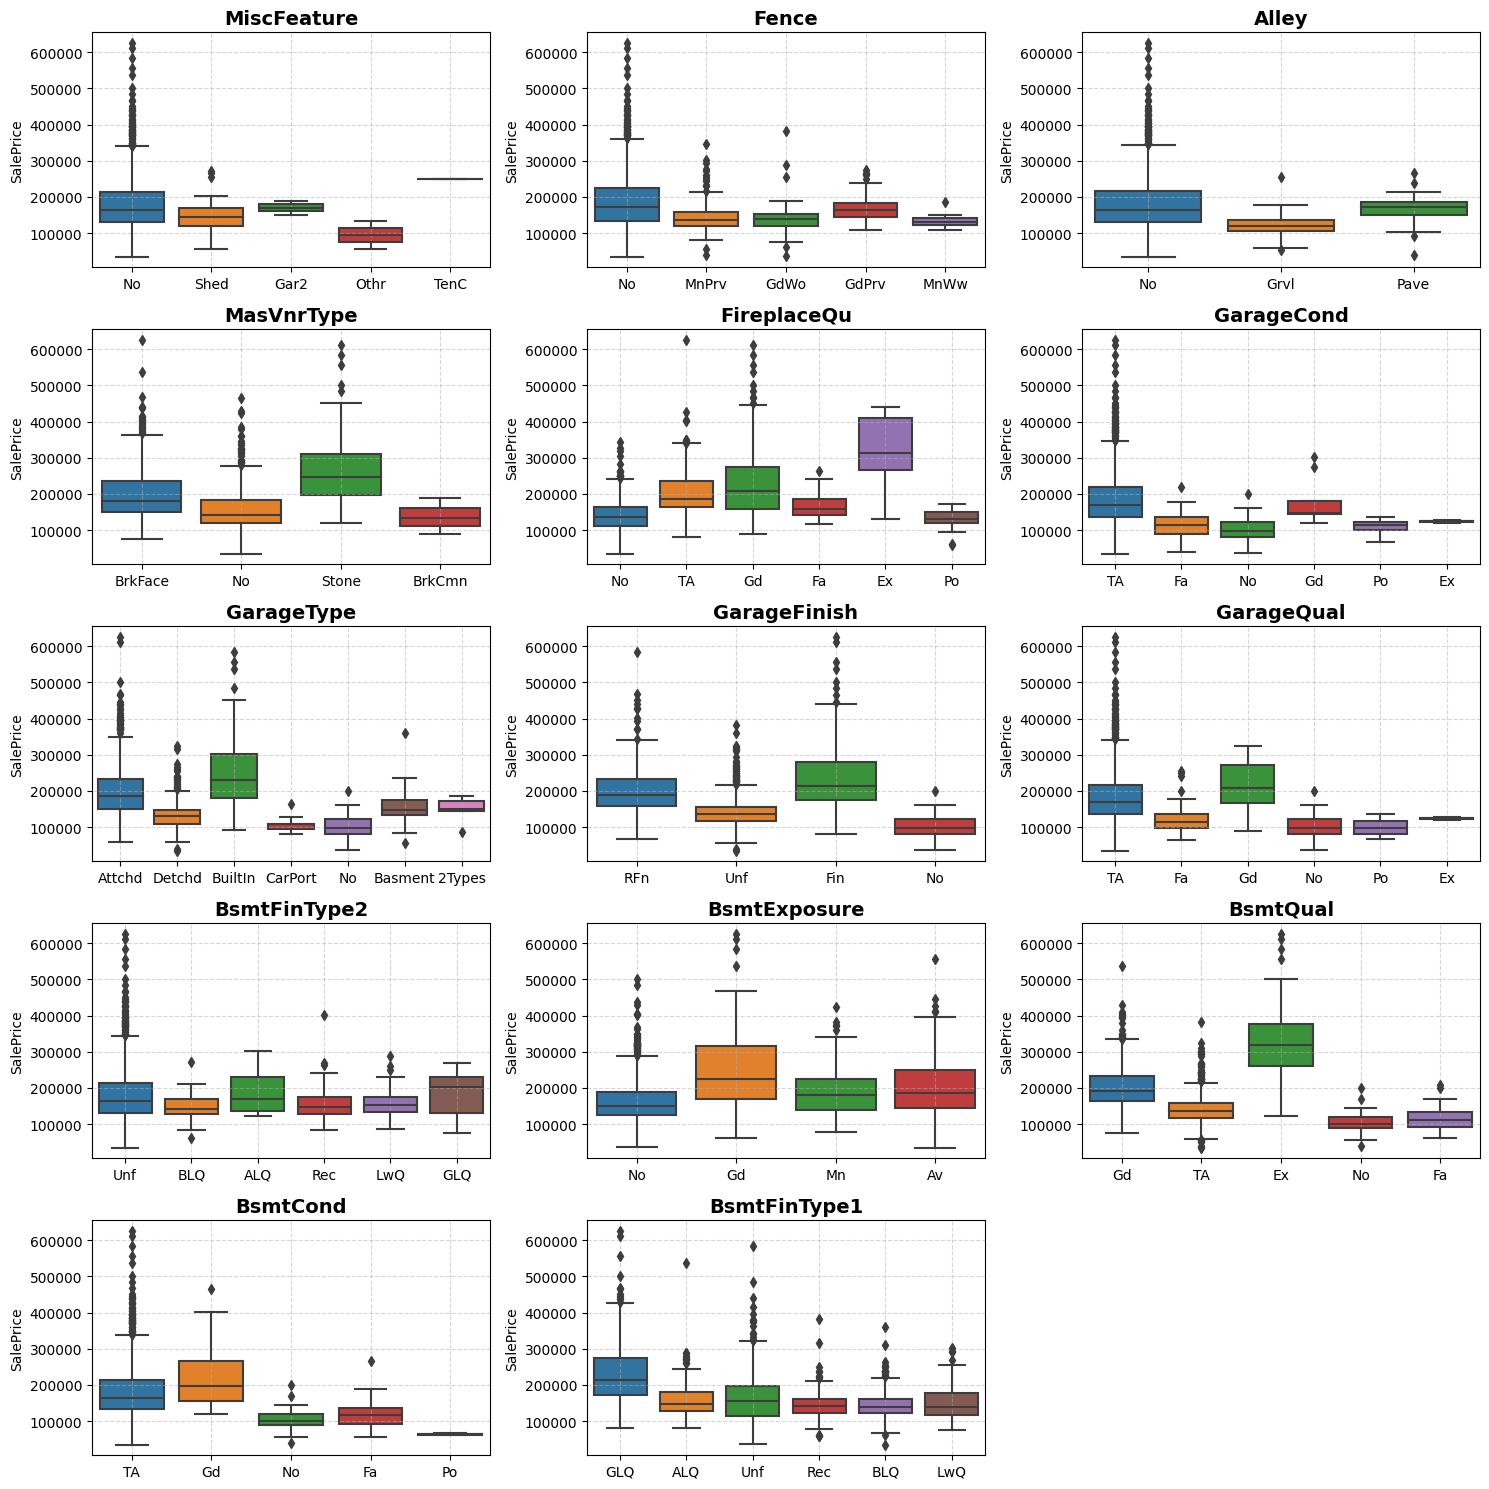

In [10]:
NaN_features = [
    'MiscFeature', 'Fence', 'Alley', 'MasVnrType', 
    'FireplaceQu', 'GarageCond', 'GarageType', 'GarageFinish', 
    'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 
    'BsmtCond', 'BsmtFinType1'
]

fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(NaN_features):
    sns.boxplot(x=col, y='SalePrice', data=train_df, ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=14, fontweight='bold')
    axes[i].grid(True, linestyle='--', alpha=0.5)
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Feature Engineering

### `Target Transformation`

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

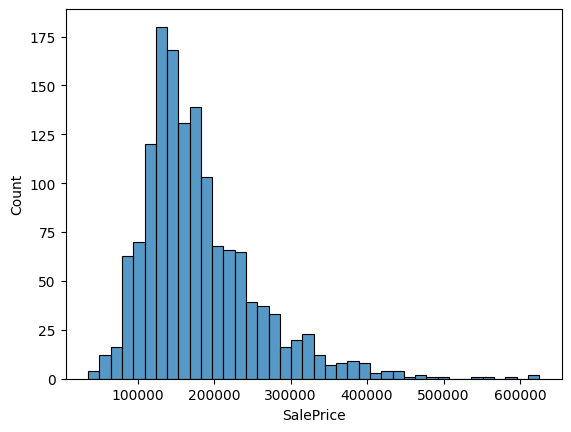

In [11]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

In [12]:
# Reducing Target Skewness Using Log Transformation
train_df['SalePrice'] =  np.log1p(train_df['SalePrice'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

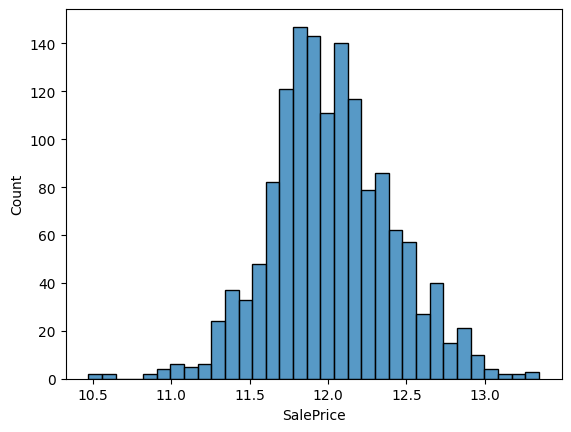

In [13]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

### `Mapping`

In [14]:
# Mapping for Ordinal features
all_mappings = {
    'Qual_map': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0, 'No': 0},
    
    'BsmtFinType_map': {'GLQ': 3, 'ALQ': 2, 'Unf': 2, 'BLQ': 1, 'Rec': 1, 'LwQ': 1, 'No': 0, 'NA': 0},
    'BsmtExposure_map': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'No_Bsmt': 0},
    'BsmtCond_map': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'No': 0},
    
    'GarageFinish_map': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'No': 0},
    'GarageQual_map': {'Gd': 3, 'Ex': 2, 'TA': 2, 'Fa': 1, 'Po': 0, 'No': 0},
    'GarageCond_map': {'Gd': 2, 'TA': 2, 'Ex': 1, 'Fa': 1, 'Po': 1, 'No': 0},
    'GarageType_map': {'BuiltIn': 3, '2Types': 2, 'Basment': 2, 'Attchd': 2, 'Detchd': 1, 'CarPort': 0, 'No': 0},
    
    'LandSlope_map': {'Gtl': 0, 'Mod': 1, 'Sev': 0},
    'LandContour_map': {'HLS': 3, 'Low': 2, 'Lvl': 1, 'Bnk': 0},
    'LotShape_map': {'Reg': 0, 'IR1': 1, 'IR2': 1, 'IR3': 1},
    'MSZoning_map': {'FV': 2, 'RL': 1, 'C (all)': 0, 'RM': 0, 'RH': 0},
    
    'Foundation_map': {'PConc': 2, 'Wood': 2, 'Stone': 2, 'CBlock': 1, 'BrkTil': 1, 'Slab': 0},
    'Electrical_map': {'SBrkr': 1, 'FuseF': 0, 'FuseA': 0, 'FuseP': 0, 'Mix': 0},
    'HeatingQC_map': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 2, 'No': 0},
    'CentralAir_map': {'Y': 1, 'N': 0},
    
    'Functional_map': {'Typ': 3, 'Min1': 1, 'Min2': 1, 'Mod': 1, 'Maj1': 1, 'Maj2': 0, 'Sev': 1, 'Sal': 0},
    'HouseStyle_map': {'2Story': 2, '2.5Fin': 2, 'SLvl': 2, '1Story': 1, '1.5Fin': 1, 'SFoyer': 1, '2.5Unf': 1, '1.5Unf': 0},
    'MasVnrType_map': {'Stone': 2, 'BrkFace': 1, 'BrkCmn': 0, 'No': 0},
    'ExterCond_map': {'Ex': 3, 'TA': 3, 'Gd': 2, 'Fa': 1, 'Po': 1, 'No': 0},
    'PavedDrive_map': {'Y': 2, 'P': 1, 'N': 0},
    'Alley_map': {'Pave': 2, 'No': 1, 'Grvl': 0},
    'Condition1_map': {'PosA': 2, 'PosN': 2, 'RRNe': 1, 'RRNn': 1, 'Norm': 1, 'RRAe': 0, 'RRAn': 0, 'Feedr': 0, 'Artery': 0}
}

def apply_ordinal_mappings(df, maps):
    qual_cols = ['ExterQual', 'BsmtQual', 'KitchenQual', 'FireplaceQu']
    for col in qual_cols:
        df[col] = df[col].map(maps['Qual_map']).fillna(0)
        
    for col in ['BsmtFinType1', 'BsmtFinType2']:
        df[col] = df[col].map(maps['BsmtFinType_map']).fillna(0)
        
    single_mappings = {
        'HeatingQC': 'HeatingQC_map', 'BsmtExposure': 'BsmtExposure_map',
        'PavedDrive': 'PavedDrive_map', 'GarageFinish': 'GarageFinish_map',
        'CentralAir': 'CentralAir_map', 'LandSlope': 'LandSlope_map',
        'LandContour': 'LandContour_map', 'LotShape': 'LotShape_map',
        'Functional': 'Functional_map', 'Alley': 'Alley_map',
        'Foundation': 'Foundation_map', 'HouseStyle': 'HouseStyle_map',
        'MasVnrType': 'MasVnrType_map', 'GarageType': 'GarageType_map',
        'MSZoning': 'MSZoning_map', 'Condition1': 'Condition1_map',
        'ExterCond': 'ExterCond_map', 'GarageQual': 'GarageQual_map',
        'Electrical': 'Electrical_map', 'BsmtCond': 'BsmtCond_map',
        'GarageCond': 'GarageCond_map'
    }
    
    for col, map_name in single_mappings.items():
        df[col] = df[col].map(maps[map_name]).fillna(0)
        
    return df

train_df = apply_ordinal_mappings(train_df, all_mappings)
test_df = apply_ordinal_mappings(test_df, all_mappings)

In [15]:
# Mapping for Nominal features
mappings = {
    'Neighborhood': {k: 'Rare_N' for k in ['MeadowV', 'Blmngtn', 'BrDale', 'Veenker', 'NPkVill', 'Blueste']},
    'Exterior1st': {k: 'Rare_Ext' for k in ['AsbShng', 'BrkComm', 'Stone', 'AsphShn', 'ImStucc', 'CBlock']},
    'Exterior2nd': {k: 'Rare_Ext' for k in ['AsbShng', 'ImStucc', 'Brk Cmn', 'Stone', 'AsphShn', 'Other', 'CBlock']},
    'LotConfig': {'CulDSac': 'CulDSac_FR3', 'FR3': 'CulDSac_FR3'},
    'RoofStyle': {k: 'Other' for k in ['Gambrel', 'Flat', 'Mansard', 'Shed']}
}

for col, mapping in mappings.items():
    train_df[col] = train_df[col].replace(mapping)
    test_df[col] = test_df[col].replace(mapping)

def refine_sales(df):
    df['SaleCondition'] = df['SaleCondition'].apply(
        lambda x: 'Sale_Discount' if x in ['Abnorml', 'AdjLand']
        else 'Sale_High' if x == 'Partial'
        else 'Sale_Normal'
    )

    df['SaleType'] = df['SaleType'].apply(
        lambda x: 'Sale_High' if x in ['Con', 'New']
        else 'Sale_Normal' if x in ['WD', 'CWD']
        else 'Sale_Discount'
    )
    return df

train_df = refine_sales(train_df)
test_df = refine_sales(test_df)

### `New Features`

In [16]:
# Creating New features

def create_features(df):

    df['houseage'] = df['YrSold'] - df['YearBuilt']
    df['houseremodelage'] = df['YrSold'] - df['YearRemodAdd']
    df['totalarea'] = df['GrLivArea'] + df['TotalBsmtSF']
    df['totalbaths'] = df['FullBath'] + df['BsmtFullBath'] + 0.5 * (df['BsmtHalfBath'] + df['HalfBath'])
    df['totalporchsf'] = df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF']
    
    return df

train_df = create_features(train_df)
test_df = create_features(test_df)

In [17]:
# Delete old features
old_features = ['YrSold', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'TotalBsmtSF',
                'FullBath', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF',
                '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF']

train_df.drop(columns=old_features, inplace=True, errors='ignore')
test_df.drop(columns=old_features, inplace=True, errors='ignore')

## Feature Selection

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


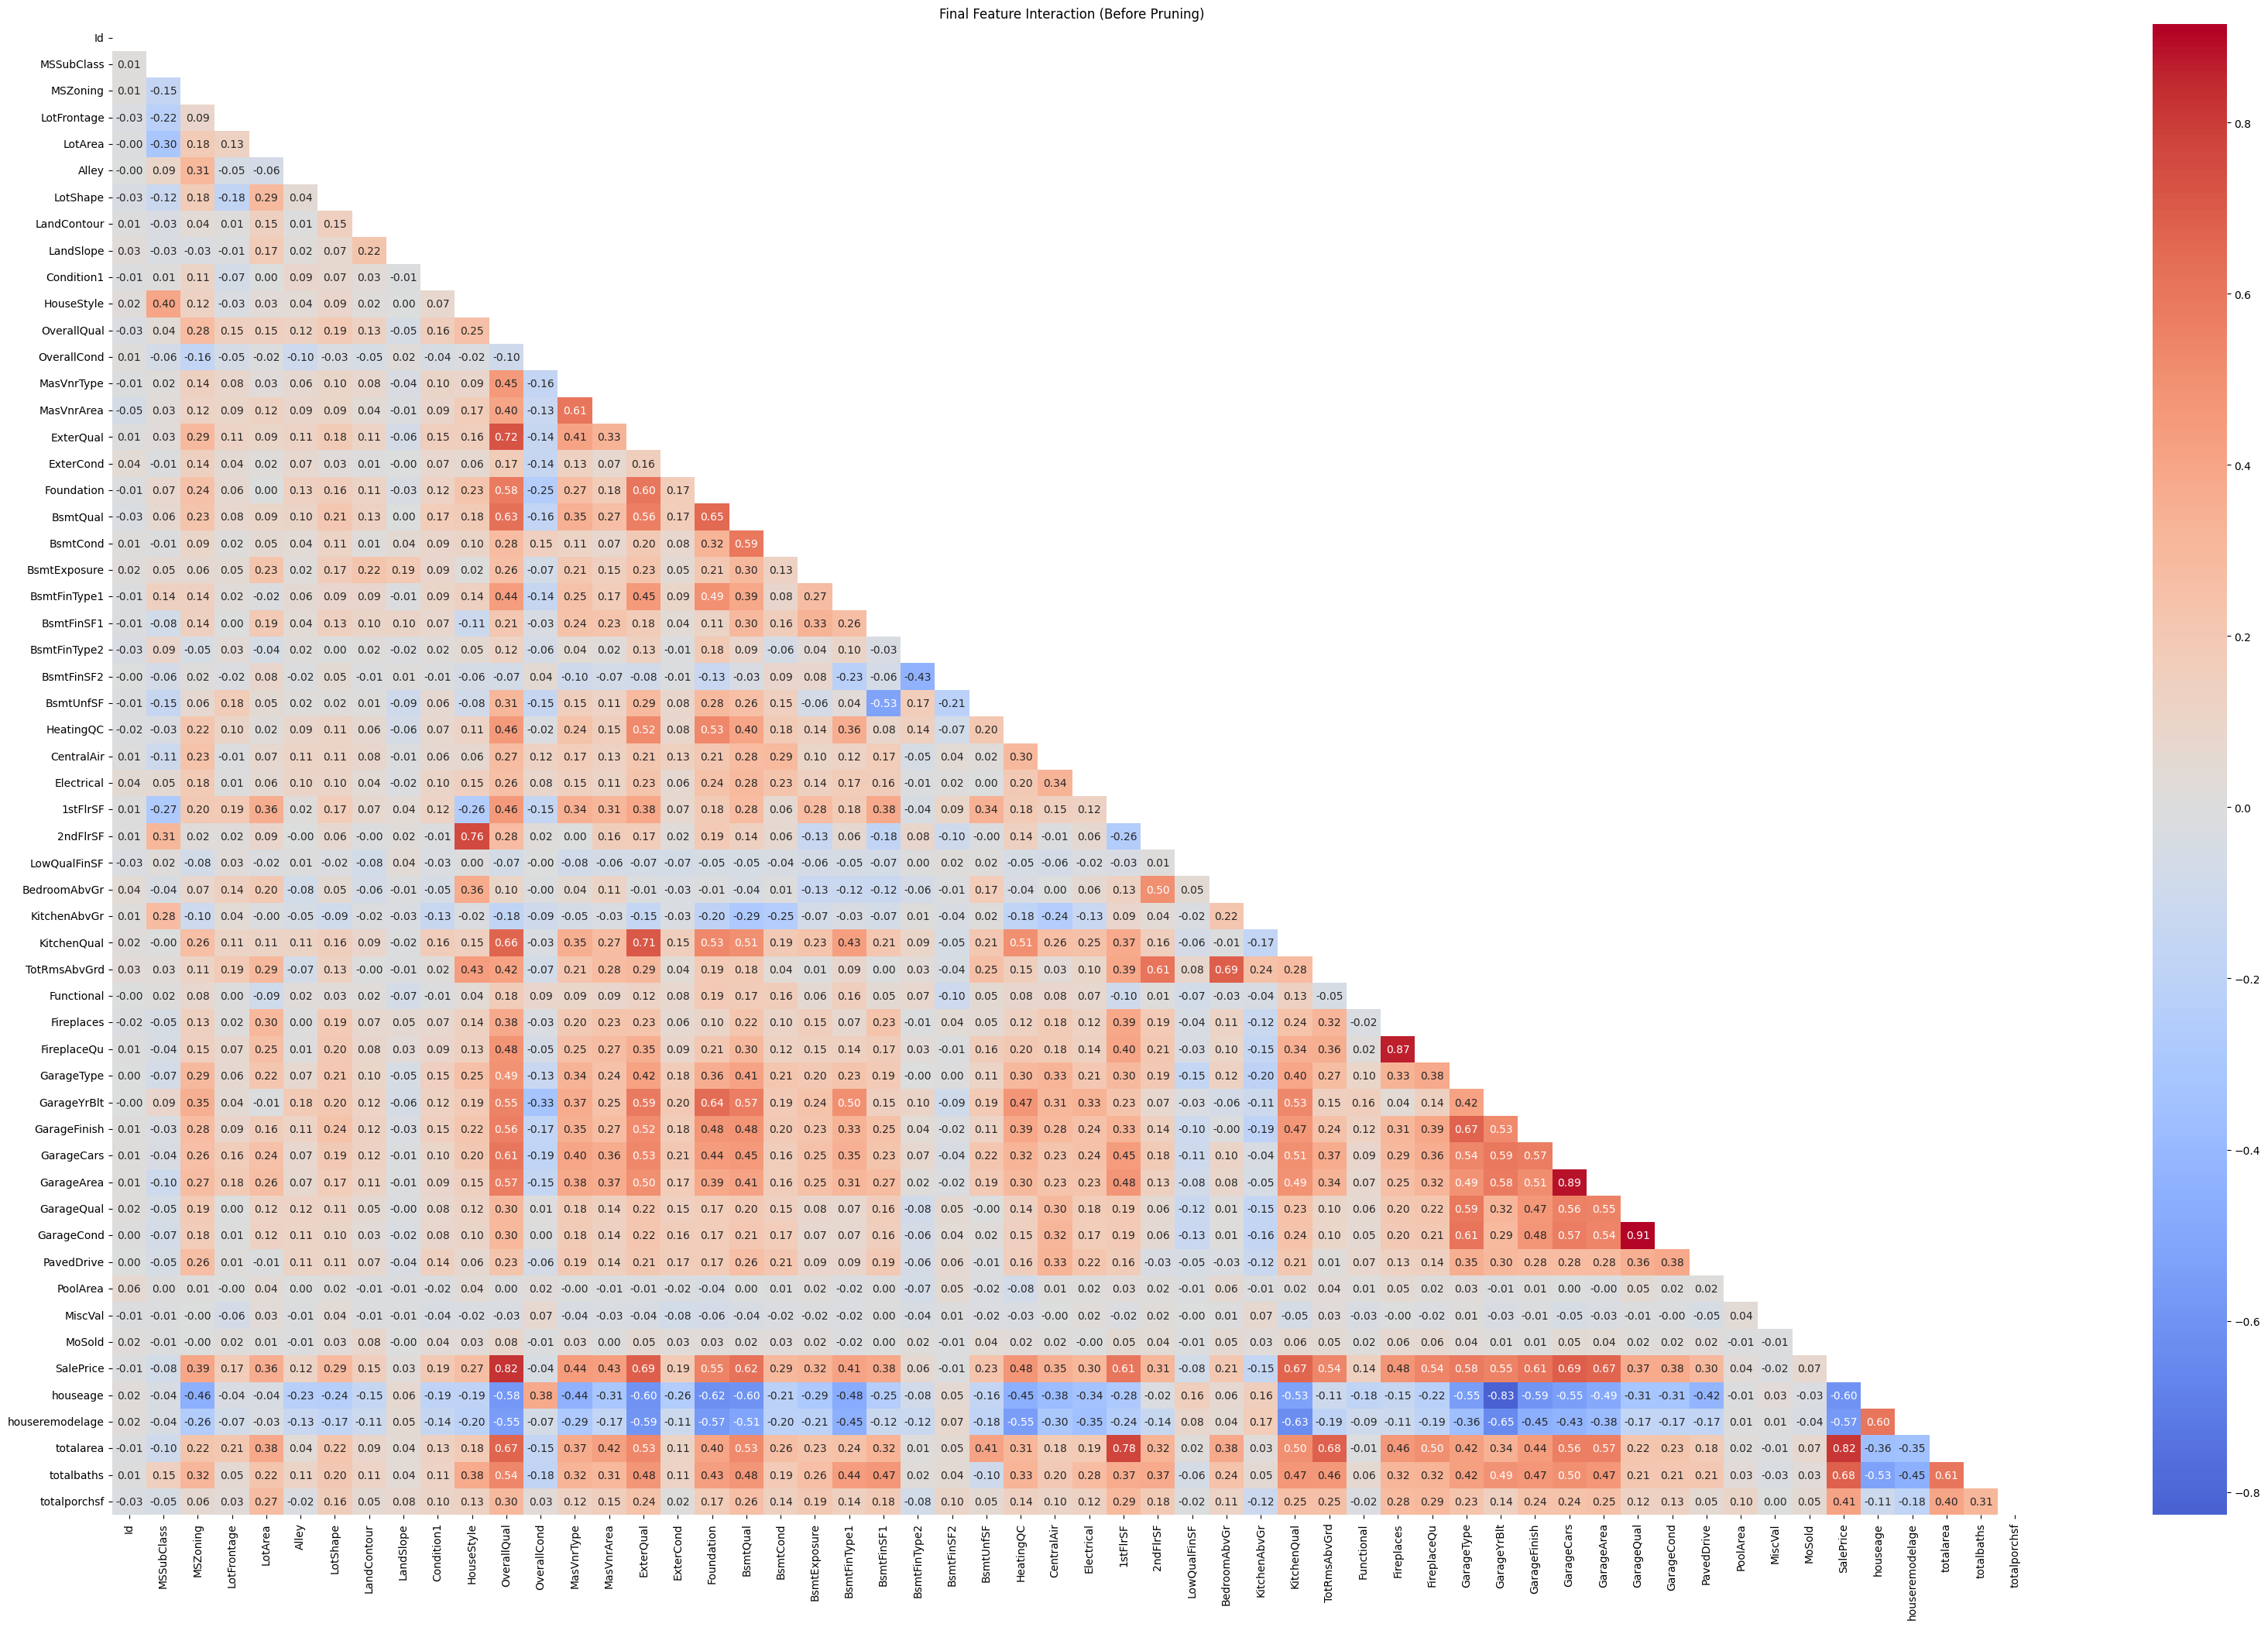

In [18]:
correlation_matrix = train_df.corr(numeric_only=True) 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(40,25))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("Final Feature Interaction (Before Pruning)")
plt.show()

In [19]:
# Feature Selection & Dimensionality Reduction

# 1. Drop features with extremely high missing values (>80% as decided in EDA)
cols_to_drop_missing = ['PoolQC', 'MiscFeature', 'Fence'] 

# 2. Drop features with near-zero variance (Dominant category > 95%)
# These features don't provide enough information for the model to learn
cols_to_drop_dominant = ['Street', 'Utilities', 'Condition2', 'Heating', 'RoofMatl']

# 3. Drop highly correlated features (Multicollinearity)
# We keep one feature from each highly correlated pair to reduce redundancy:
# - GarageCars kept (dropped GarageArea)
# - YearBuilt kept (dropped GarageYrBlt)
# - GarageQual kept (dropped GarageCond)
# - FireplaceQu kept (dropped Fireplaces)
cols_to_drop_corr = ['GarageArea', 'GarageYrBlt', 'GarageCond', 'Fireplaces']

final_drop_list = cols_to_drop_missing + cols_to_drop_dominant + cols_to_drop_corr

train_df.drop(columns=final_drop_list, inplace=True, errors='ignore')
test_df.drop(columns=final_drop_list, inplace=True, errors='ignore')

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


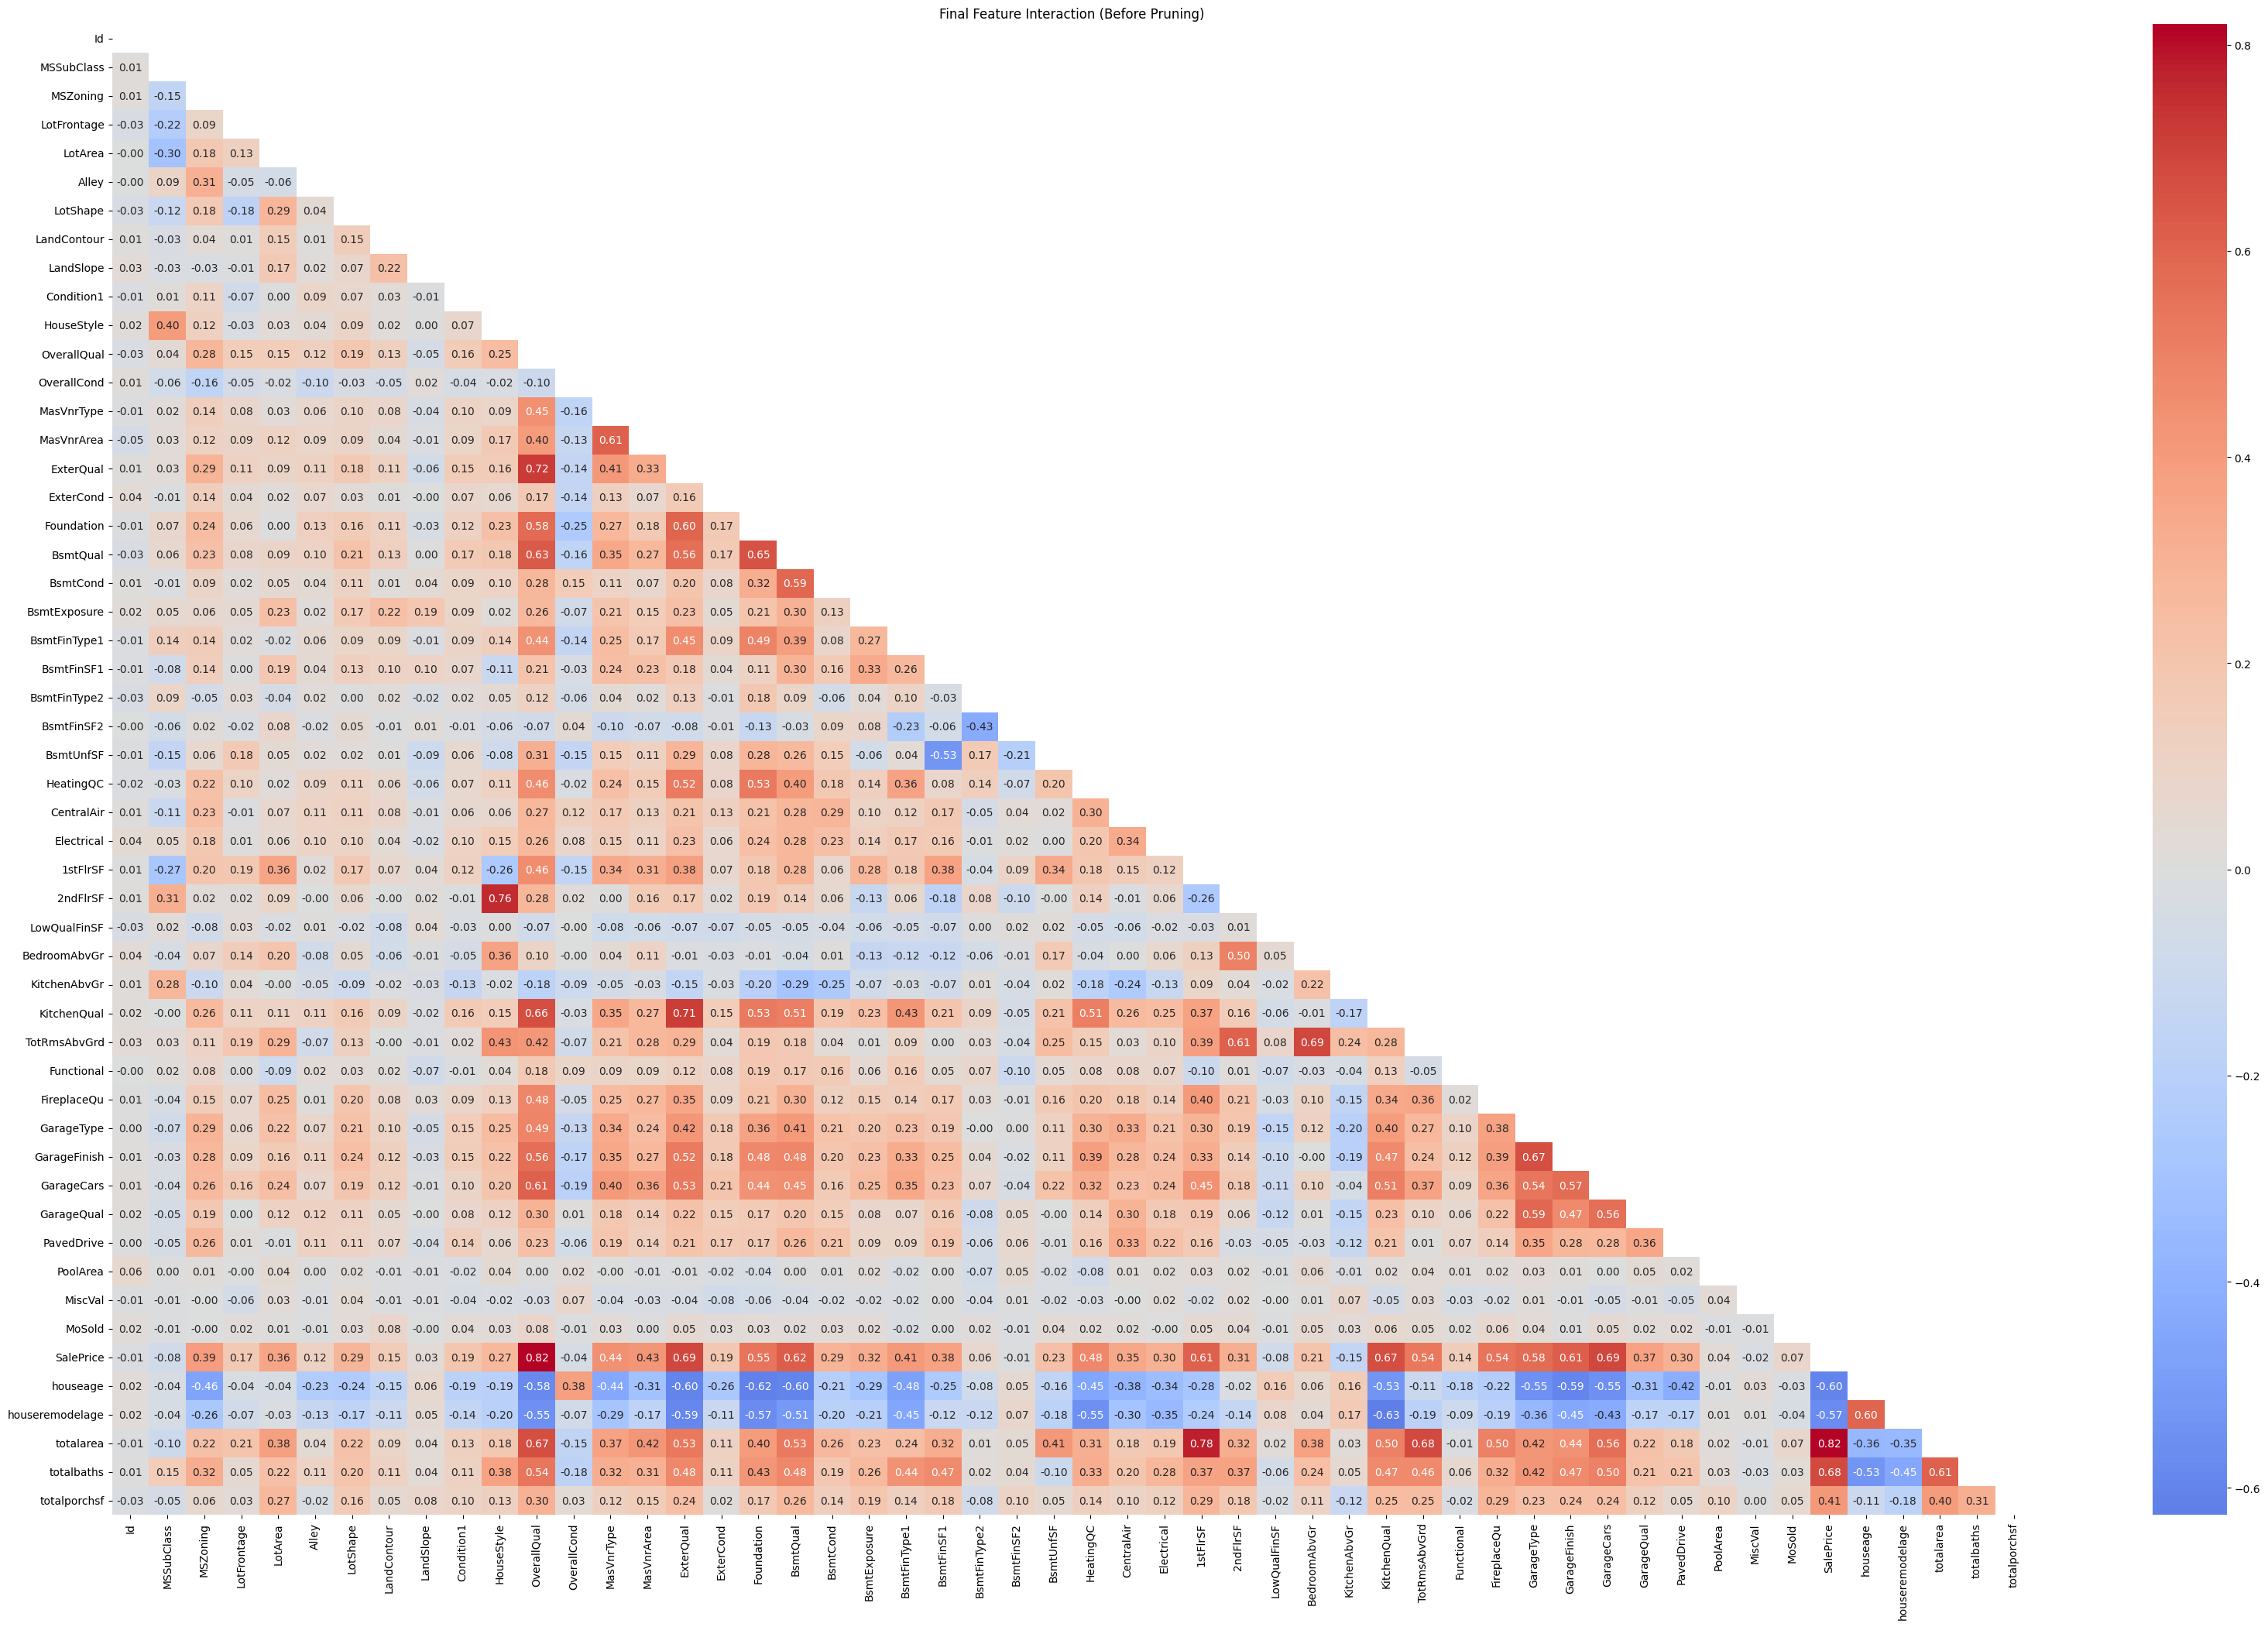

In [20]:
correlation_matrix = train_df.corr(numeric_only=True) 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(40,25))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("Final Feature Interaction (Before Pruning)")
plt.show()

## Data Transformation & Pipeline

### `Data Splitting`

In [21]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

### `Automated Preprocessing Pipeline`

In [23]:
targetE_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']
ohe_cols = ['LotConfig','RoofStyle', 'SaleCondition', 'BldgType', 'SaleType']
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

targetE_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('tergetE', ce.TargetEncoder(smoothing=10))
])

ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [24]:
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('targetE_p', targetE_pipeline, targetE_cols),
    ('ohe_p', ohe_pipeline, ohe_cols)
    ],
    remainder='passthrough',
    n_jobs=-1)

In [25]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [26]:
X_train_preprocessed = pipeline.fit_transform(X_train, y_train)
X_test_preprocessed = pipeline.transform(X_test)

### build model

In [27]:
lr = LinearRegression()
lr.fit(X_train_preprocessed, y_train)

y_pred_lr = lr.predict(X_test_preprocessed)

np.sqrt(mean_squared_error(y_test, y_pred_lr))

0.11274277994656434

In [28]:
RFR = RandomForestRegressor(random_state=13)
param_grid_RFR = {
    'max_depth': [15, 20],
    'n_estimators': [500, 1000],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [0.3, 'sqrt']
}

rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
rfr_cv.fit(X_train_preprocessed, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'max_features': [0.3, 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [500, 1000]},
             scoring='neg_mean_squared_error', verbose=1)

In [29]:
y_pred_rfr = rfr_cv.predict(X_test_preprocessed)
np.sqrt(mean_squared_error(y_test, y_pred_rfr))

0.12906316225443207

In [30]:
np.sqrt(-1 * rfr_cv.best_score_)

0.1288842795231377

In [31]:
rfr_cv.best_params_

{'max_depth': 15,
 'max_features': 0.3,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [32]:
XGB = XGBRegressor(random_state=13, verbosity=0)
param_grid_XGB = {
    'learning_rate': [0.05],
    'n_estimators': [1000, 1500],
    'max_depth': [3, 4],
    'min_child_weight': [2],
    'gamma': [0, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.4, 0.6]
}

In [33]:
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
xgb_cv.fit(X_train_preprocessed, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=13, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.6], 'gamma': [0, 0.1],
                         'learning_rate': [0.05], 'max_depth': [3, 4],
                         'min_child_weight': [2], 'n_estimators': [1000, 1500],
                         'subsample': [0.8]},
             scoring='neg_mean_squared_error', verbose=1)

In [34]:
y_pred_xgb = xgb_cv.predict(X_test_preprocessed)

np.sqrt(mean_squared_error(y_test, y_pred_xgb))

0.11825729929896611

In [35]:
np.sqrt(-1 * xgb_cv.best_score_)

0.11860466923663308

In [36]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 2,
 'n_estimators': 1000,
 'subsample': 0.8}

In [37]:
ridge = Ridge()
param_grid_ridge = {
    'alpha': [0.1, 1, 5, 10, 20, 50],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [38]:
ridge_cv.fit(X_train_preprocessed, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 5, 10, 20, 50],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [39]:
y_pred_ridge = ridge_cv.predict(X_test_preprocessed)

np.sqrt(mean_squared_error(y_test, y_pred_ridge))

0.11277115841278028

In [40]:
np.sqrt(-1 * ridge_cv.best_score_)

0.11453684606648624

In [41]:
ridge_cv.best_params_

{'alpha': 0.1, 'solver': 'lsqr'}

In [42]:
GBR = GradientBoostingRegressor()
param_grid_GBR = {
    'max_depth': [4, 5, 6],
    'n_estimators': [1000, 3000],
    'min_samples_leaf': [15, 25],
    'learning_rate': [0.005, .01],
    'max_features': ['sqrt', 0.2],
    'subsample': [0.8]
}

In [43]:
GBR_cv = GridSearchCV(GBR, param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
GBR_cv.fit(X_train_preprocessed, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.01], 'max_depth': [4, 5, 6],
                         'max_features': ['sqrt', 0.2],
                         'min_samples_leaf': [15, 25],
                         'n_estimators': [1000, 3000], 'subsample': [0.8]},
             scoring='neg_mean_squared_error')

In [44]:
y_pred_GBR = GBR_cv.predict(X_test_preprocessed)

np.sqrt(mean_squared_error(y_test, y_pred_GBR))

0.11692700545250372

In [45]:
np.sqrt(-1 * GBR_cv.best_score_)

0.11090717449556732

In [46]:
GBR_cv.best_params_

{'learning_rate': 0.005,
 'max_depth': 4,
 'max_features': 0.2,
 'min_samples_leaf': 15,
 'n_estimators': 3000,
 'subsample': 0.8}

In [47]:
lgbm_regressor = lgb.LGBMRegressor(verbose=-1)
param_grid_lgbm = {
    'boosting_type': ['gbdt'],
    'num_leaves': [15, 20],
    'learning_rate': [0.01],
    'n_estimators': [2500],
    'min_child_samples': [10, 15],
    'reg_alpha': [0.1, 0.2],
    'reg_lambda': [1, 2],
    'colsample_bytree': [0.4, 0.5]
}

In [48]:
lgbm_cv = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
lgbm_cv.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(verbose=-1), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt'],
                         'colsample_bytree': [0.4, 0.5],
                         'learning_rate': [0.01], 'min_child_samples': [10, 15],
                         'n_estimators': [2500], 'num_leaves': [15, 20],
                         'reg_alpha': [0.1, 0.2], 'reg_lambda': [1, 2]},
             scoring='neg_mean_squared_error', verbose=1)

In [49]:
y_pred_lgbm = lgbm_cv.predict(X_test_preprocessed)

np.sqrt(mean_squared_error(y_test, y_pred_lgbm))

0.11933064472666668

In [50]:
np.sqrt(-1 * lgbm_cv.best_score_)

0.11465718107794234

In [51]:
lgbm_cv.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.4,
 'learning_rate': 0.01,
 'min_child_samples': 15,
 'n_estimators': 2500,
 'num_leaves': 15,
 'reg_alpha': 0.1,
 'reg_lambda': 1}

In [52]:
catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)
param_grid_cat = {
    'iterations':[1000, 2000],
    'depth': [4, 6],
    'learning_rate': [0.01, 0.05],
    'random_strength': [1],
    'border_count': [128, 254]
}

In [53]:
cat_cv = GridSearchCV(catboost, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
cat_cv.fit(X_train_preprocessed, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x78f8d13972d0>,
             n_jobs=-1,
             param_grid={'border_count': [128, 254], 'depth': [4, 6],
                         'iterations': [1000, 2000],
                         'learning_rate': [0.01, 0.05],
                         'random_strength': [1]},
             scoring='neg_mean_squared_error', verbose=2)

In [54]:
y_pred_cat = cat_cv.predict(X_test_preprocessed)

np.sqrt(mean_squared_error(y_test, y_pred_cat))

0.11673116261737286

In [55]:
np.sqrt(-1 * cat_cv.best_score_)

0.1162901705867325

In [56]:
cat_cv.best_params_

{'border_count': 254,
 'depth': 4,
 'iterations': 2000,
 'learning_rate': 0.01,
 'random_strength': 1}

In [57]:
final_blend = (0.40 * y_pred_ridge) + (0.20 * y_pred_cat) + (0.20 * y_pred_GBR) + (0.10 * y_pred_lgbm) + (0.10 * y_pred_xgb) 
final_blend

array([11.60581632, 12.02866554, 11.90762635, 11.76522361, 12.00996815,
       12.32733417, 11.51632916, 12.41237412, 12.41085389, 11.92113571,
       12.77781097, 11.63868536, 12.06013227, 11.503778  , 12.28098351,
       12.11482372, 11.792003  , 11.8077185 , 12.10003961, 12.15043538,
       12.0496467 , 11.65945415, 11.67760893, 12.38914932, 11.75453212,
       11.86632577, 11.41806413, 12.54026224, 12.18145117, 11.97719638,
       12.27563913, 12.05018544, 11.78988759, 12.25301396, 12.51095596,
       12.49316173, 12.30519038, 12.68310522, 12.46916278, 12.2095614 ,
       11.68867003, 11.73463409, 11.79238777, 12.21524578, 11.66406646,
       12.05130381, 12.00047008, 11.28370812, 12.31952757, 12.37452929,
       11.66720455, 11.6340968 , 12.25919432, 11.49361561, 11.84850001,
       12.31625603, 12.35627644, 11.97307513, 11.92556625, 11.99708483,
       11.65547904, 12.09990145, 12.05055349, 11.68229653, 11.94851743,
       11.37569453, 11.94220765, 11.79827239, 12.26450479, 12.29

In [58]:
np.sqrt(mean_squared_error(y_test, final_blend))

0.11125151556533917

In [59]:
estimators = [
    ('ridge', ridge_cv.best_estimator_),
    ('cat', cat_cv.best_estimator_),
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('lgb', lgbm_cv.best_estimator_),
]

In [60]:
vr = VotingRegressor(estimators=estimators, weights=[0.40, 0.20, 0.20, 0.10, 0.10])
vr.fit(X_train_preprocessed, y_train)

VotingRegressor(estimators=[('ridge', Ridge(alpha=0.1, solver='lsqr')),
                            ('cat',
                             <catboost.core.CatBoostRegressor object at 0x78f8cb5561d0>),
                            ('gbr',
                             GradientBoostingRegressor(learning_rate=0.005,
                                                       max_depth=4,
                                                       max_features=0.2,
                                                       min_samples_leaf=15,
                                                       n_estimators=3000,
                                                       subsample=0.8)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel...
                                          max_leaves=None, min_child_weight=2,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=1000, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=13, ...)),
                            ('lgb',
                             LGBMRegressor(colsample_bytree=0.4,
                                           learning_rate=0.01,
                                           min_child_samples=15,
                                           n_estimators=2500, num_leaves=15,
                                           reg_alpha=0.1, reg_lambda=1,
                                           verbose=-1))],
                weights=[0.4, 0.2, 0.2, 0.1, 0.1])

In [61]:
y_pred_vr = vr.predict(X_test_preprocessed)
mean_squared_error(y_test, y_pred_vr, squared=False)

0.11117770782154858

In [62]:
estimator = [
    ('cat', cat_cv.best_estimator_),
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('lgb', lgbm_cv.best_estimator_),
]

In [63]:
df_test_preprocess = pipeline.transform(test_df)

p1_comp = ridge_cv.predict(df_test_preprocess)
p2_comp = cat_cv.predict(df_test_preprocess)
p3_comp = GBR_cv.predict(df_test_preprocess)
p4_comp = xgb_cv.predict(df_test_preprocess)
p5_comp = lgbm_cv.predict(df_test_preprocess)

final_blend_comp = (0.40 * p1_comp) + (0.20 * p2_comp) + (0.20 * p3_comp) + (0.10 * p4_comp) + (0.10 * p5_comp)

In [64]:
y_final_prices = np.expm1(final_blend_comp)
df_out = test_df[['Id']].copy()
df_out['SalePrice'] = y_final_prices

df_out.to_csv('submission_v2.csv', index=False)